In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipynb.fs.full.call_sign_times import call_sign_times

In [2]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1267985,1616812,2023-12-31 22:44:38,DISPUTE,6E19,4K97,REPORT TAKEN
1267986,1616813,2023-12-31 22:44:38,DISPUTE,6E19,6E19,REPORT TAKEN
1267987,1616814,2023-12-31 22:44:38,DISPUTE,6E19,5X51,REPORT TAKEN
1267988,1616817,2023-12-31 22:56:40,TRAFFIC STOP,4F74,4F72,UNIFORM TRAFFIC CITATION ISSUED


In [3]:
target_call_signs = ["1J77", "3J78", "4J79"]

In [4]:
def calculate_counts(table: pd.DataFrame, call_signs: list):
    # Group by month and count calls
    monthly_call_count = table.groupby(table['Call Time'].dt.to_period('M')).size().rename('Total Calls')

    # Filter data for specific call signs
    monthly_cahoots = table[table['Call Sign'].isin(call_signs)]
    monthly_call_sign = monthly_cahoots.groupby(monthly_cahoots['Call Time'].dt.to_period('M')).size().rename('Cahoots Calls')

    # Merge the counts
    t_v_c = pd.merge(monthly_call_count, monthly_call_sign, left_index=True, right_index=True, how='left').reset_index()
    t_v_c['Call Time'] = t_v_c['Call Time'].dt.to_timestamp()

    # Ensure correct columns are displayed
    t_v_c = t_v_c[['Call Time', 'Cahoots Calls', 'Total Calls']]

    return t_v_c

In [5]:
time_ranges = [
    (pd.Timestamp(call_sign_times['3J78']['First']), pd.Timestamp(call_sign_times['1J77']['First']), 'red'),
    (pd.Timestamp(call_sign_times['1J77']['First']), pd.Timestamp(call_sign_times['4J79']['First']), 'blue'),
    (pd.Timestamp(call_sign_times['4J79']['First']), pd.Timestamp(call_sign_times['1J77']['Last']), 'green')
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start < call_time < end:
            return color
    return None  # Default color if no range is matched

In [6]:
clean_data['Color'] = clean_data['Call Time'].apply(lambda x: assign_color(x, time_ranges))

shifts_1 = clean_data[clean_data["Color"] == 'red']
shifts_2 = clean_data[clean_data["Color"] == 'blue']
shifts_3 = clean_data[clean_data["Color"] == 'green']

In [7]:
def shuffle_dataframe(table, n):
    new_table = table.iloc[:n].copy()
    # print(new_table)
    shuffled_call_signs = np.random.choice(new_table['Call Sign'].values, n)
    # print(shuffled_call_signs)
    new_table["Call Sign"] = shuffled_call_signs
    # pd.to_datetime(new_table["Call Time"])
    return new_table

def shuffled_percentages(table, n, k):
    mean_list = []
    for _ in range(n):
        shuffled_list = shuffle_dataframe(table, k)
        # print(shuffled_list)

        count_table = calculate_counts(shuffled_list, target_call_signs)
        pd.to_datetime(count_table['Call Time'])
        # print(count_table)
        count_table["Percentage"] = count_table["Cahoots Calls"] / count_table["Total Calls"] * 100
        # print(list(count_table['Percentage']))
        mean_list += [count_table["Percentage"].mean()]
    return mean_list

In [8]:
iterations = 500
random_values_drawn = 1000

means_1_shift = shuffled_percentages(shifts_1, iterations, random_values_drawn)
means_2_shift = shuffled_percentages(shifts_2, iterations, random_values_drawn)
means_3_shift = shuffled_percentages(shifts_3, iterations, random_values_drawn)

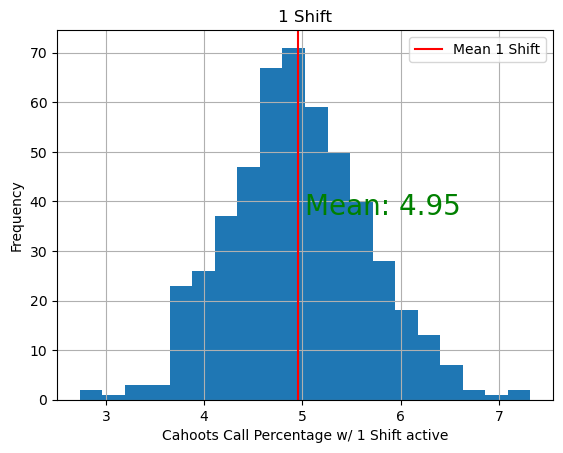

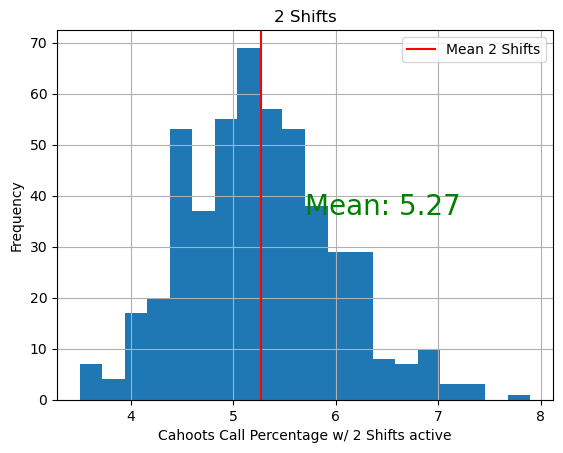

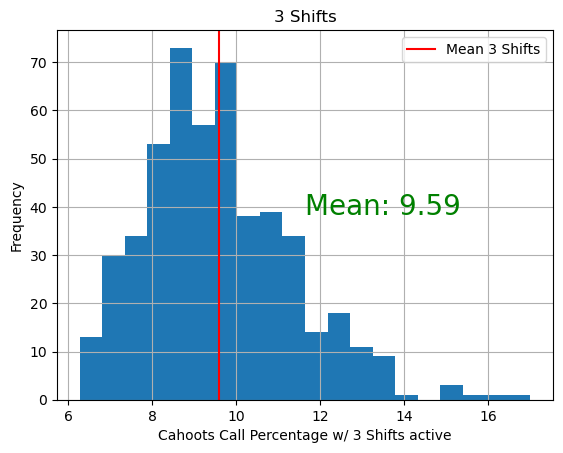

[4.8,
 5.800000000000001,
 5.6000000000000005,
 4.7,
 3.5000000000000004,
 5.3,
 5.7,
 4.7,
 5.4,
 6.1,
 5.2,
 6.0,
 4.8,
 4.5,
 6.2,
 6.1,
 6.9,
 5.5,
 4.0,
 3.5999999999999996,
 5.7,
 5.2,
 5.4,
 5.7,
 4.0,
 5.3,
 5.1,
 5.1,
 4.5,
 5.6000000000000005,
 4.8,
 4.0,
 4.0,
 6.2,
 6.1,
 5.5,
 4.5,
 5.4,
 4.6,
 4.9,
 5.4,
 4.7,
 5.3,
 4.8,
 6.0,
 5.3,
 5.1,
 5.0,
 4.1000000000000005,
 6.0,
 4.7,
 4.3999999999999995,
 5.8999999999999995,
 5.2,
 4.3999999999999995,
 6.2,
 5.0,
 5.1,
 4.6,
 5.5,
 5.0,
 4.5,
 4.8,
 4.9,
 6.800000000000001,
 5.2,
 6.1,
 5.0,
 4.6,
 4.1000000000000005,
 6.2,
 4.5,
 5.5,
 5.0,
 6.0,
 5.4,
 5.1,
 4.9,
 5.3,
 6.2,
 4.8,
 5.1,
 6.800000000000001,
 5.800000000000001,
 5.1,
 4.5,
 4.5,
 5.8999999999999995,
 4.9,
 4.6,
 4.3999999999999995,
 5.2,
 5.6000000000000005,
 5.2,
 5.8999999999999995,
 5.0,
 4.3999999999999995,
 5.0,
 5.2,
 5.1,
 5.1,
 4.5,
 6.0,
 5.800000000000001,
 4.9,
 7.1,
 4.8,
 5.800000000000001,
 4.0,
 4.2,
 5.2,
 5.800000000000001,
 6.4,
 5.89999999999

In [14]:
shifts = [means_1_shift, means_2_shift, means_3_shift]
shift_names = ["1 Shift", "2 Shifts", "3 Shifts"]


for shift, name in zip(shifts, shift_names):
    plt.style.use('default')
    plt.grid(True)
    plt.hist(shift, bins=20)
    plt.axvline(np.mean(shift), color='r', label = f"Mean {name}")
    plt.title(name)
    plt.legend(loc='upper right')
    ax = plt.gca()
    plt.text(np.mean(ax.get_xlim()), np.mean(ax.get_ylim()), f"Mean: {round(np.mean(shift), 2)}", color='g', size=20)
    plt.ylabel("Frequency")
    plt.xlabel(f"Cahoots Call Percentage w/ {name} active")
    # plt.grid(True)
    plt.show()
means_2_shift

In [12]:
test_1 = stats.kstest(means_1_shift, means_2_shift)
test_2 = stats.kstest(means_1_shift, means_3_shift)
test_3 = stats.kstest(means_2_shift, means_3_shift)
print(f"1 Shift vs 2 Shifts: P-Value {test_1[1]}")
print(f"1 Shift vs 3 Shifts: P-Value {test_2[1]}")
print(f"2 Shifts vs 3 Shifts: P-Value {test_3[1]}")

1 Shift vs 2 Shifts: P-Value 2.106809320880401e-11
1 Shift vs 3 Shifts: P-Value 1.784397311577276e-280
2 Shifts vs 3 Shifts: P-Value 5.216598662761808e-255
